# Actividad 4 4.1

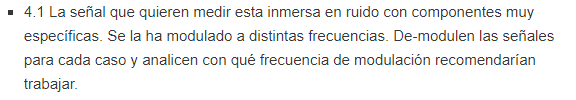

### Importamos las librerias y los archivos 4.1 de v1

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib nbagg


medicion_410 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=410Hz.txt', delimiter=' ', skiprows=3)
medicion_450 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=450Hz.txt', delimiter=' ', skiprows=3)
medicion_475 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=475Hz.txt', delimiter=' ', skiprows=3)
medicion_1350 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=1350Hz.txt', delimiter=' ', skiprows=3)
medicion_1375 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=1375Hz.txt', delimiter=' ', skiprows=3)

medicion = [medicion_410, medicion_450, medicion_475, medicion_1350, medicion_1375]

## Análisis de todas las mediciones

In [80]:
f_samp = 100000
muestras = len(medicion_410)
T = 1/f_samp #periodo
t = np.linspace(0, muestras-1, muestras)*T

f_ref = np.array([410, 450, 475, 1350, 1375])
omega_ref = f_ref*2*np.pi

fc = 15  # para el filtro
orden = 20  #para el filtro
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') #para el filtro

referencia_x = []
referencia_y = []

PSDx = []
PSDy = []

PSDxFiltrada = []
PSDyFiltrada = []

for i in range(len(omega_ref)):
    referencia_x.append(np.array(np.sin(omega_ref[i]*t)))
    referencia_y.append(np.array(np.cos(omega_ref[i]*t)))
    
    PSDx.append(2*medicion[i]*referencia_x[i])
    PSDy.append(2*medicion[i]*referencia_y[i])
    
    PSDxFiltrada.append(signal.sosfilt(sos, PSDx[i]))
    PSDyFiltrada.append(signal.sosfilt(sos, PSDy[i]))

## Figuras

<IPython.core.display.Javascript object>


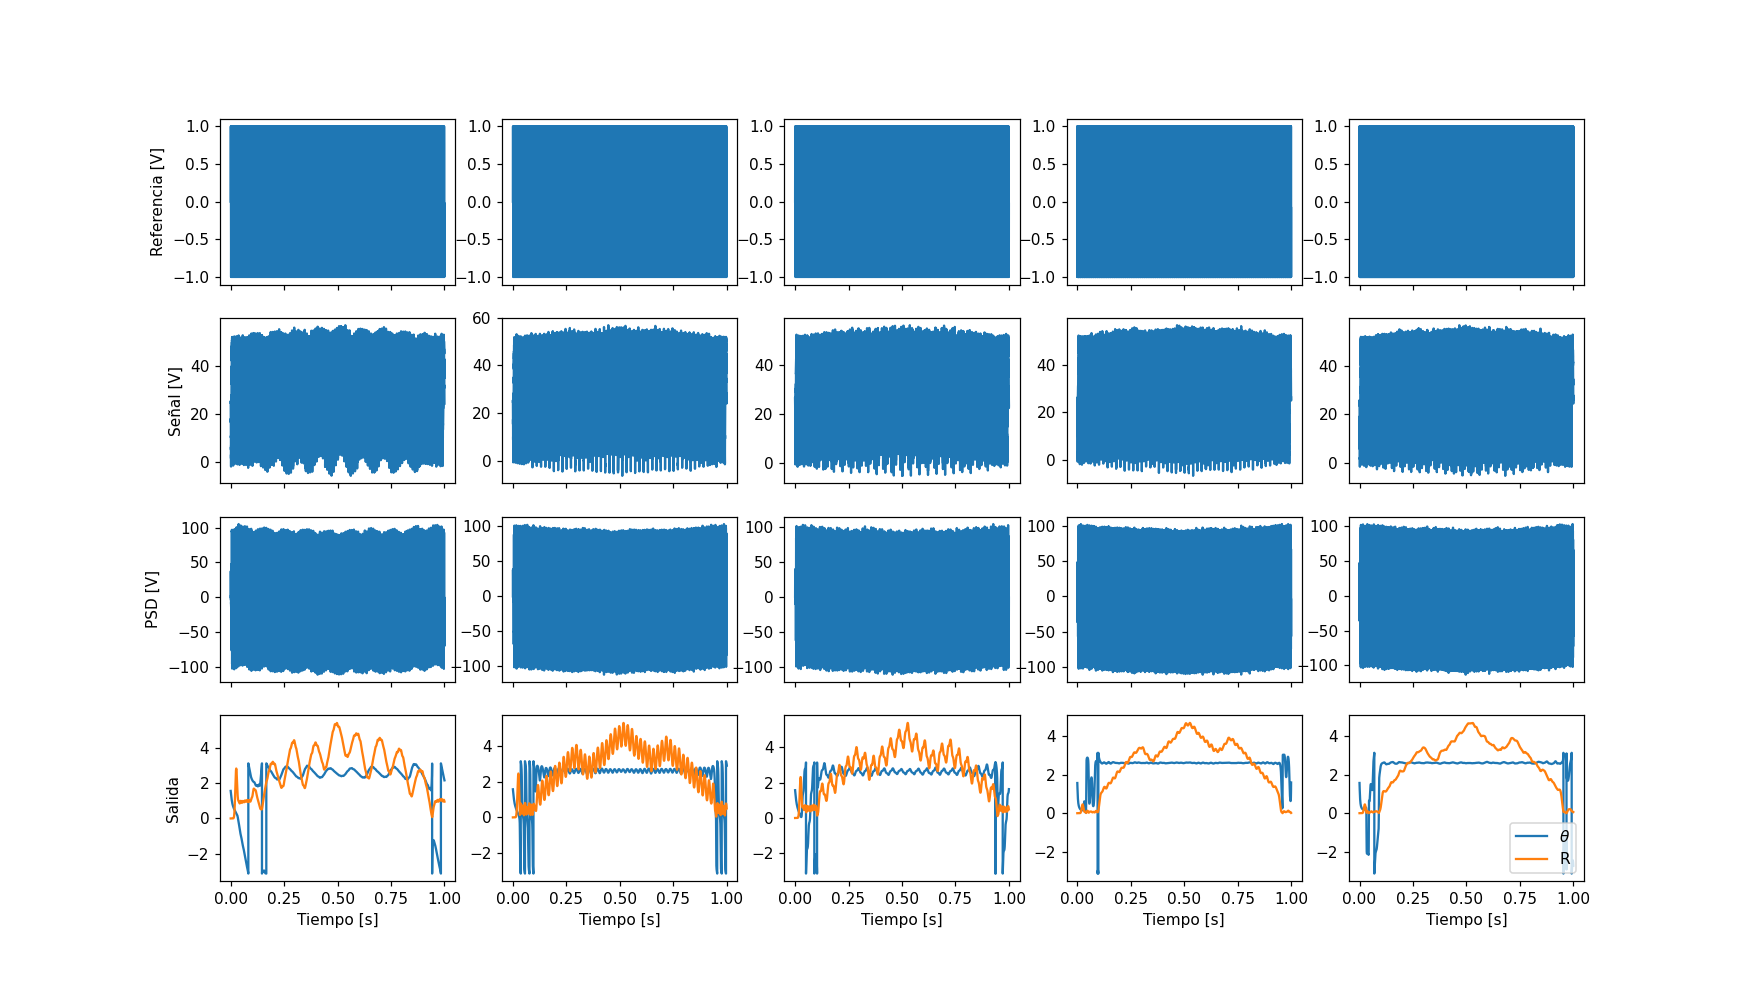

In [82]:
#%matplotlib nbagg
fig, ax  = plt.subplots(4,5,figsize=(16,9),  num=1, sharex=True)
for i in range(len(medicion)):
    ax[0][i].plot(t, referencia_x[i], label = 'referencia')
    ax[0][0].set_ylabel('Referencia [V]')

    ax[1][i].plot(t,medicion[i], label = 'señal')
    ax[1][0].set_ylabel('Señal [V]')

    ax[2][i].plot(t, PSDx[i], label = 'señal')
    ax[2][0].set_ylabel('PSD [V]')

    ax[3][i].plot(t,np.arctan2(PSDyFiltrada[i], PSDxFiltrada[i]), label = r'$\theta$')
    ax[3][i].plot(t, np.sqrt(PSDxFiltrada[i]**2+PSDyFiltrada[i]**2), label = 'R')
    ax[3][0].set_ylabel('Salida')
    ax[3][i].set_xlabel('Tiempo [s]')
#    plt.legend(loc='lower right')
    plt.show()
plt.legend(loc='lower right')


## FFT

<IPython.core.display.Javascript object>


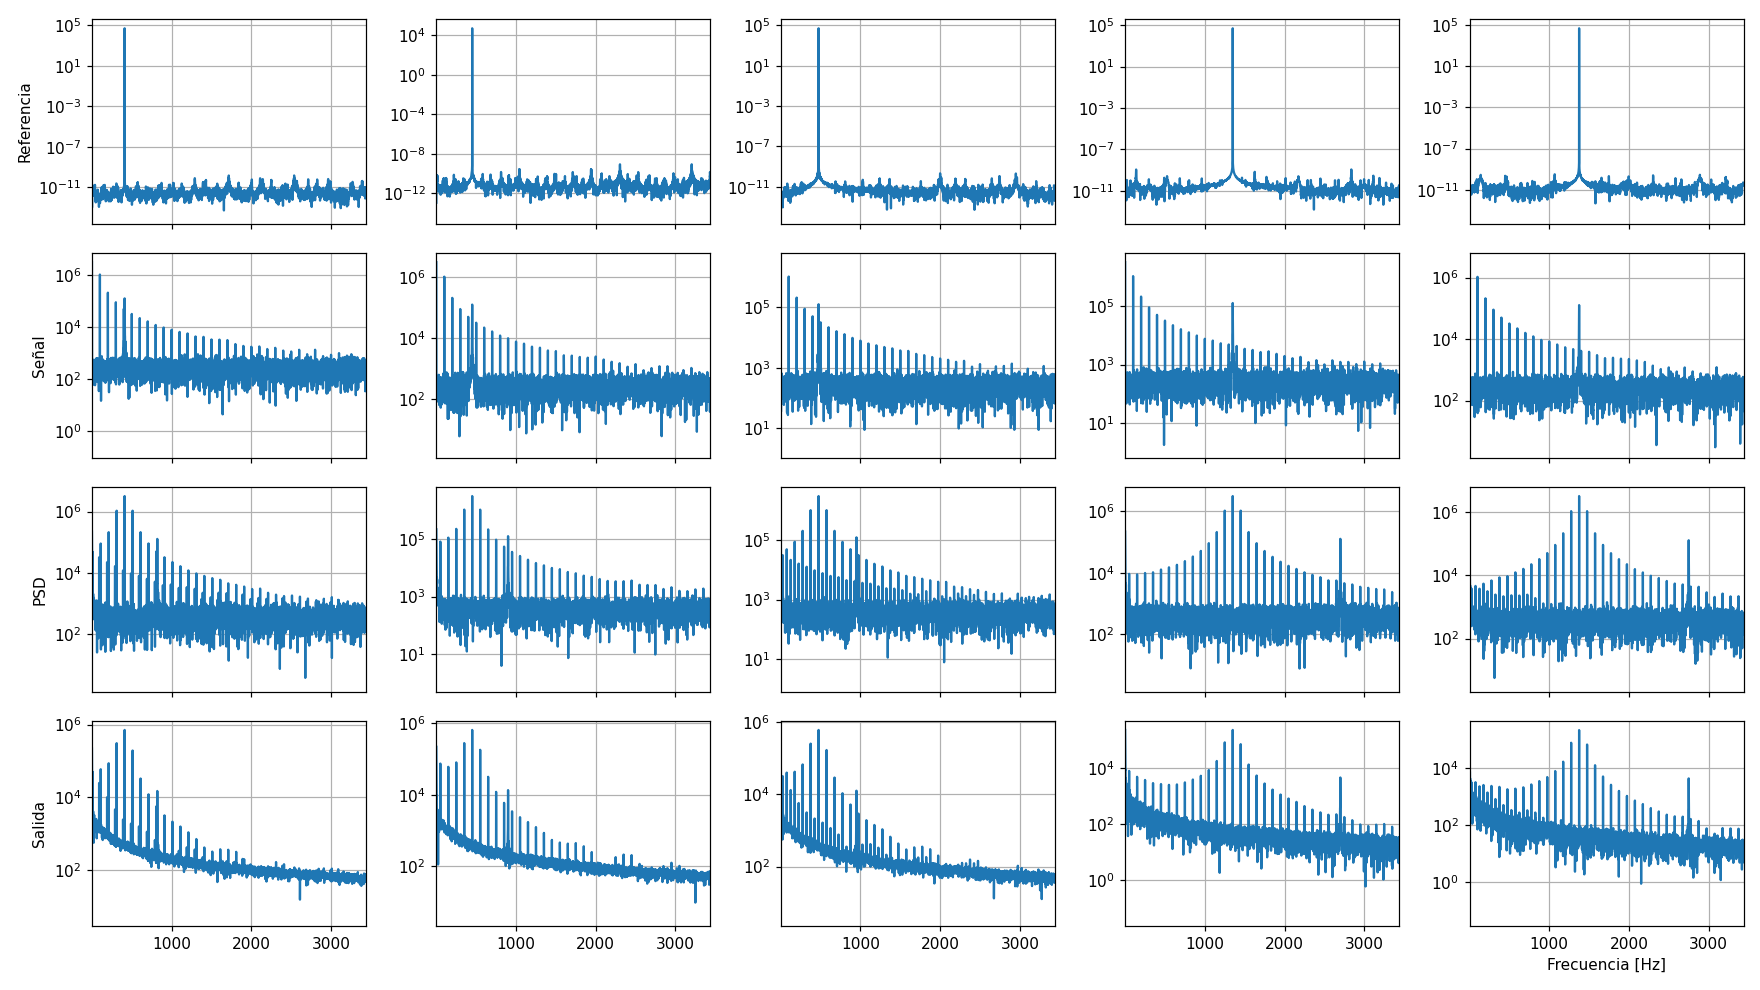

In [75]:
L = muestras
fig, ax = plt.subplots(4,5,figsize=  (16,9),num=2,sharex=True)
for i in range(len(medicion)):
    ax[3][4].set_xlabel('Frecuencia [Hz]')
    ax[3][4].set_xlim([1,2.5*f_ref[i]])
    ax[3][4].set_xscale('linear')


    # Armamos el vector de frecuencias.
    freqs=np.fft.fftfreq(L,1/f_samp)

    # 1 Grafica la FFT de la referencia
    fftReferencia= np.abs(np.fft.fft(referencia_x[i]));
    ax[0][i].semilogy(freqs[0:L//2],fftReferencia[0:L//2]) 
    ax[0][0].set_ylabel('Referencia'),ax[0][i].grid(True)


    # 2 Grafica la FFT de la señal
    fftSenial= np.abs(np.fft.fft(medicion[i]));
    ax[1][i].semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
    ax[1][0].set_ylabel('Señal'),ax[1][i].grid(True)

    # 3 Grafica la FFT de la señal multiplicada
    fftPSDx= np.abs(np.fft.fft(PSDx[i]));
    fftPSDy= np.abs(np.fft.fft(PSDy[i]));
    ax[2][i].semilogy(freqs[0:L//2],fftPSDx[0:L//2]) 
    ax[2][0].set_ylabel('PSD'),ax[2][i].grid(True)


    # 4 Grafica la FFT de la señal demodulada
    fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada[i]));
    fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada[i]));
    ax[3][i].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2]) 
    ax[3][0].set_ylabel('Salida'),ax[3][i].grid(True)


    plt.tight_layout()  